# Battles' Impact on Country's Development

In this notebook the World Development Indicators dataset is used from the 
* [The World Bank Data Catalog ](https://datacatalog.worldbank.org/)

This dataset with 66 columns and 383837 rows of data includes the annual national, regional and global estimates of 1453 development indicators in topics including climate change, poverty, education and economic growth from 1960-2020. In this assignment, the Battle-related deaths, Internally displaced persons by conflict and violence, and GDP (current $US) is used.


## Questions
* How are deaths caused by battles in the past five years? Has the number of deaths increased or decreased?
* Does the battles affect the number of Internally Displaced People(IDPs)?
* How does the GDP looks like in these countries with battles?

In [1]:
import numpy as np
import pandas as pd    
from matplotlib import pyplot as plt

## Load Data into a pandas dataframe

In [2]:
wdi_df = pd.read_csv('WDIData.csv')
wdi_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.511262,16.966046,17.411737,17.808234,18.179760,18.558937,18.949636,19.333168,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383833,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN,NaN
383834,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.418352,NaN,NaN
383835,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.658057,NaN,NaN
383836,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.900000,59.200000,59.400000,59.500000,59.700000,59.900000,60.000000,60.200000,60.4,NaN


* get a rough overview of the data

In [3]:
wdi_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,3.730600e+04,4.235500e+04,4.459900e+04,4.444900e+04,4.499000e+04,4.718300e+04,4.721300e+04,4.896200e+04,4.854400e+04,5.039000e+04,...,2.165220e+05,2.109090e+05,2.183960e+05,2.138010e+05,2.135260e+05,2.105190e+05,2.047900e+05,1.823930e+05,1.143940e+05,0.0
mean,2.606912e+11,2.484410e+11,2.507683e+11,2.596332e+11,2.769563e+11,2.996829e+11,3.220407e+11,3.390772e+11,3.912049e+11,4.232991e+11,...,2.351807e+12,2.695297e+12,2.845051e+12,3.029713e+12,3.300846e+12,3.498133e+12,4.005935e+12,4.975475e+12,8.734584e+12,NaN
std,1.083076e+13,1.116149e+13,1.164416e+13,1.225256e+13,1.320174e+13,1.477374e+13,1.627996e+13,1.776937e+13,2.042132e+13,2.311371e+13,...,9.373851e+13,1.084061e+14,1.185115e+14,1.254528e+14,1.390306e+14,1.503015e+14,1.748940e+14,2.165428e+14,3.445456e+14,NaN
min,-3.344191e+14,-3.823000e+14,-4.327955e+14,-4.769875e+14,-5.339358e+14,-6.264716e+14,-7.120024e+14,-8.245134e+14,-9.379467e+14,-1.122499e+15,...,-3.013845e+14,-3.495617e+14,-5.189385e+14,-8.530882e+14,-1.374106e+15,-1.345846e+15,-1.297804e+15,-1.376877e+15,-2.021453e+15,NaN
25%,4.603734e+00,4.539324e+00,4.468750e+00,4.707169e+00,4.772071e+00,4.592374e+00,4.825076e+00,4.716315e+00,4.965726e+00,4.485339e+00,...,5.958221e+00,6.059576e+00,6.000000e+00,6.086657e+00,6.000000e+00,6.190435e+00,5.768516e+00,6.139901e+00,6.000000e+00,NaN
50%,3.817307e+01,3.640000e+01,3.528646e+01,3.468300e+01,3.560753e+01,3.701788e+01,3.890197e+01,3.993818e+01,4.081916e+01,3.751860e+01,...,4.176522e+01,4.356138e+01,4.267388e+01,4.500300e+01,4.410376e+01,4.643876e+01,4.296548e+01,4.530243e+01,4.702370e+01,NaN
75%,1.100000e+05,9.212900e+04,6.520150e+04,8.269600e+04,9.495775e+04,1.498130e+05,1.886600e+05,1.743958e+05,2.808695e+05,2.317355e+05,...,1.522864e+04,2.620072e+04,1.360658e+04,2.537292e+04,2.000000e+04,2.436100e+04,3.156125e+04,1.340000e+05,4.459497e+06,NaN
max,8.305080e+14,9.255598e+14,1.005053e+15,1.078014e+15,1.177340e+15,1.380081e+15,1.535078e+15,1.713571e+15,1.967195e+15,2.287805e+15,...,8.676844e+15,1.000180e+16,1.155185e+16,1.167182e+16,1.319156e+16,1.534503e+16,1.923397e+16,2.487906e+16,3.600718e+16,NaN


* print array of columns and the index array

In [4]:
wdi_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

## Battle Related Deaths Indicator

* Narrow down the dataset to include only the rows that include information on the Battle Related Deaths (number of people) from the last five years (2015-2020).



In [5]:
wdi_battle_df=wdi_df[wdi_df['Indicator Name']=='Battle-related deaths (number of people)'] 

## Question: How many deaths are caused by battles for the past five years? Has the number of deaths increased or decreased?

* Use groupby the Country Name to find the five countries with the highest number of deaths caused by battles in 2015
* The four countries with the highest number of deaths in 2015: Syrain Arab Republic, Afghanistan, Iraq, and Yemen, Rep. 

In [6]:
year=[str(year) for year in np.arange(2015,2021)]
deaths = wdi_battle_df.groupby('Country Name')
deaths = deaths[year].agg(sum)
deaths = deaths.sort_values('2015',ascending=False)
deaths[:20]

,2015,2016,2017,2018,2019,2020
Country Name,,,,,,
IDA & IBRD total,102288.0,0.0,0.0,0.0,0.0,0.0
Low & middle income,102288.0,0.0,0.0,0.0,0.0,0.0
Fragile and conflict affected situations,95664.0,82736.0,63254.0,51599.0,48723.0,46803.0
Arab World,71350.0,60440.0,37510.0,22346.0,0.0,11090.0
Syrian Arab Republic,50666.0,42345.0,21456.0,13365.0,7548.0,4862.0
Middle income,23437.0,0.0,0.0,0.0,0.0,0.0
South Asia (IDA & IBRD),19903.0,19451.0,20421.0,26728.0,30801.0,21432.0
South Asia,19903.0,19451.0,20421.0,26728.0,30801.0,21432.0
Afghanistan,17273.0,17978.0,19014.0,25676.0,29940.0,20473.0


* The wdi_df2 pivot table shows the number of deaths caused by battles from 2015-2020 in Syrian Arab Republic,Afghanistan,Iraq,Yemen, Rep.,and Nigeria


In [15]:
wdi_df2 = pd.pivot_table(wdi_battle_df, values=year, columns=["Country Name"])
wdi_df2[["Syrian Arab Republic","Afghanistan","Iraq","Yemen, Rep."]]


Country Name,Syrian Arab Republic,Afghanistan,Iraq,"Yemen, Rep.",Nigeria
2015,50666.0,17273.0,10200.0,6716.0,4637.0
2016,42345.0,17978.0,9624.0,2846.0,2491.0
2017,21456.0,19014.0,10204.0,2733.0,1879.0
2018,13365.0,25676.0,1257.0,4505.0,1173.0
2019,7548.0,29940.0,742.0,1703.0,1326.0
2020,4862.0,20473.0,858.0,2363.0,1997.0


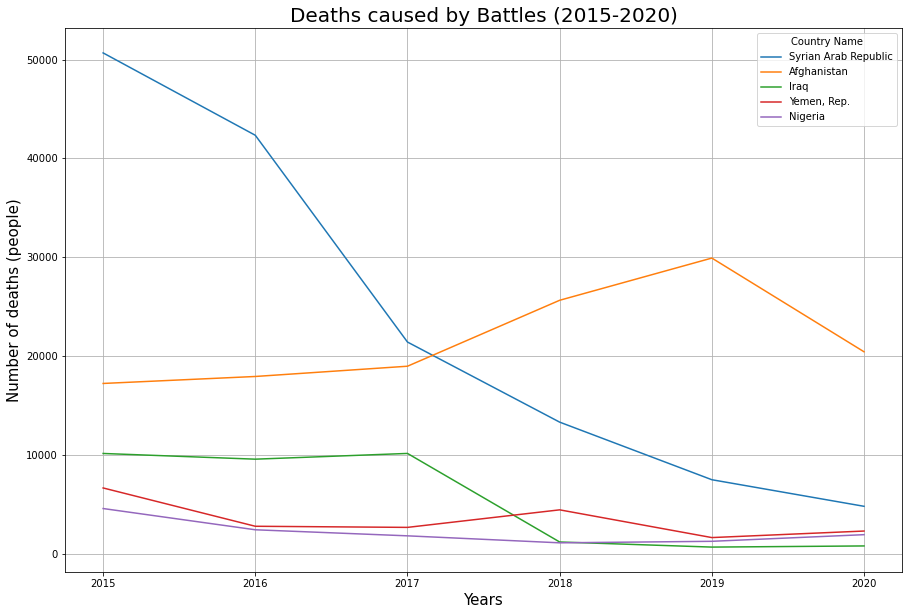

In [16]:
wdi_df2[["Syrian Arab Republic","Afghanistan","Iraq","Yemen, Rep."]].plot(figsize=(15,10))
plt.title("Deaths caused by Battles (2015-2020)",fontsize=20)
plt.ylabel("Number of deaths (people)",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.grid()

## Notable Analysis
* In Syrian Arab Republic, the number of deaths caused by battles decreased almost by half from 2016 to 2017 and continue to decrease 
* In Afghanistan, from 2017 to 2019, the number of deaths increased  before it decreased in 2020 
* In Iraq, from 2017 to 2018, the number of deaths decreased by more than half.
* In Yemen and Nigeria, the number deaths remain roughly stable with little flatuations


## Question:  Does the battles affect the number of Internally Displaced People(IDPs)?


In [8]:
wdi_idp_df=wdi_df[wdi_df['Indicator Name']=='Internally displaced persons, total displaced by conflict and violence (number of people)']
wdi_df4 = pd.pivot_table(wdi_idp_df, values=year, columns=["Country Name"])
wdi_df4[["Syrian Arab Republic","Afghanistan","Iraq","Yemen, Rep."]]

Country Name,Syrian Arab Republic,Afghanistan,Iraq,"Yemen, Rep.",Nigeria
2015,6600000.0,1174000.0,3290000.0,2509000.0,2096000.0
2016,6326000.0,1553000.0,3035000.0,1974000.0,1955000.0
2017,6784000.0,1286000.0,2648000.0,2014000.0,1707000.0
2018,6119000.0,2598000.0,1962000.0,2324000.0,2216000.0
2019,6495000.0,2993000.0,1555000.0,3635000.0,2583000.0
2020,6568000.0,3547000.0,1224000.0,3635000.0,2730000.0


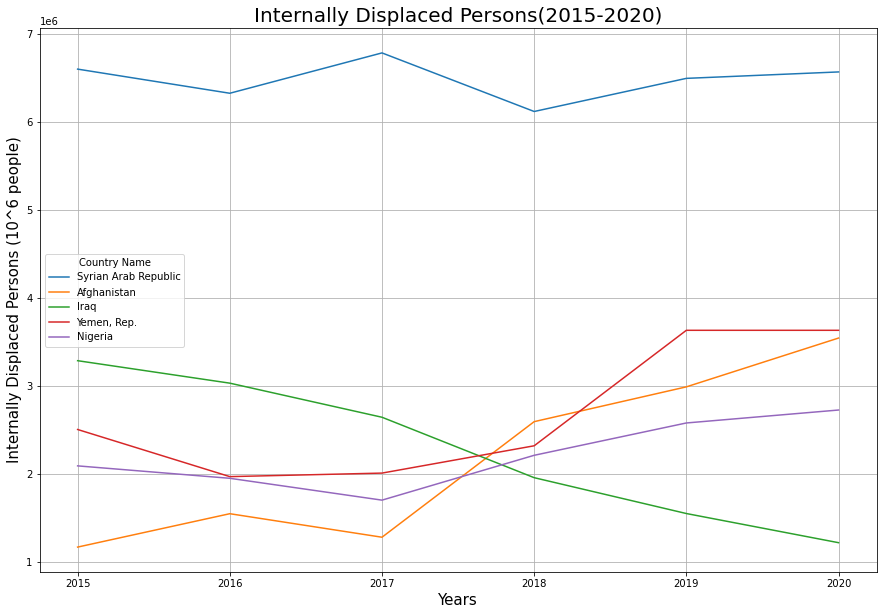

In [17]:

wdi_df4[["Syrian Arab Republic","Afghanistan","Iraq","Yemen, Rep.","Nigeria"]].plot(figsize=(15,10))
plt.title("Internally Displaced Persons(2015-2020)",fontsize=20)
plt.ylabel("Internally Displaced Persons (10^6 people)",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.grid()


## Notable Analysis
* In Syrian Arab Republic, the IDPs remains stable with small flatuations
* In Afghanistan,Nigeria and Yemen, the IDPs continously increases after 2017
* In Iraq, after 2017, the IDPs continuously decreases


## Question: How does the GDP looks like in countries with battles?
* Create a pivot table and plot the GDP (current $US) of the five countries in 2015-2020

In [10]:
wdi_gdp_df=wdi_df[wdi_df['Indicator Name']=='GDP (current US$)']
wdi_df3 = pd.pivot_table(wdi_gdp_df, values=year, columns=["Country Name"])


In [11]:
wdi_df3[["Syrian Arab Republic","Afghanistan","Iraq","Yemen, Rep."


Country Name,Syrian Arab Republic,Afghanistan,Iraq,"Yemen, Rep.",Nigeria
2015,1.649207e+10,1.913421e+10,1.667741e+11,4.244510e+10,4.868033e+11
2016,1.235698e+10,1.811656e+10,1.666025e+11,3.131737e+10,4.046500e+11
2017,1.611299e+10,1.875347e+10,1.872177e+11,2.684013e+10,3.757465e+11
2018,2.149034e+10,1.805323e+10,2.273675e+11,2.160614e+10,3.971905e+11
2019,2.277788e+10,1.879945e+10,2.350972e+11,NaN,4.481204e+11
2020,NaN,2.011614e+10,1.667570e+11,NaN,4.322938e+11


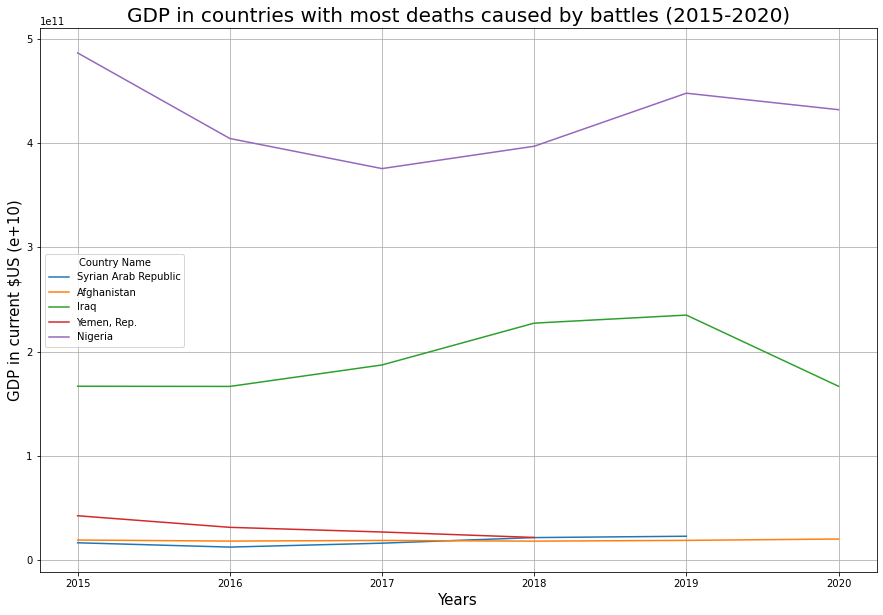

In [12]:
wdi_df3[["Syrian Arab Republic","Afghanistan","Iraq","Yemen, Rep."]].plot(figsize=(15,10))
plt.title("GDP in countries with most deaths caused by battles (2015-2020)",fontsize=20)
plt.ylabel("GDP in current $US (e+10)",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.grid()

## Notable Analysis
* In Syrian Arab Republic, Yemen and Afghanistan the GDP remains stable and low
* Nigeria has the highest GDP among the five countires and the GDP increases after 2017, but decreases from 2019 to 2020
* In Iraq, after 2017, the GDPs continuously increases,but decreases from 2019 to 2020

# Overall Analysis

From the analysis of the three data plots above, we can correlate the relationships between the number of deaths caused by battles, the number of Internally Displaced People(IDPs), and GDPs over the years 2015-2020 of the five countries (Syria,Afghanistan,Iraq,Yemen). We will first look at each country and then make a general analysis collectively.

#### Syrian Arab Republic
Since 2011, the Syrian Arab Republic has an ongoing civil war between the government and various oppositional groups including international involvements. As a consequence, hundreds and thousands of citizens were killed and  2015 was the peak of the civil war. Even though the cisis remains, the violence decreased. This is reflected in the "Deaths caused by Battle" plot. In the Internally Displaced Persons(IDPs)plot, the average number of IDPs in Syria remains stable. A possible explaination would be the civil war being ongoing making the citizens remain displaced. Similarly, the impact of the ongoing civil war appears in the GDP plot. The GDP has not increased over the five years.

#### Afghanistan
The War in Afghanistan lasted from 2001-2021 and was caused by the tensions between the Taliban forces in Afghanistan and the United States and its allies. The spike of deaths in 2017 seen in the  "Deaths caused by Battle" plot may be caused by the greatest number of mass suicide bombings and the raise of the Taliban forces and the decrease of deaths in 2020 may be due to the peace sign deal between the US and Taliban. Consequently, the IDPs appeared to raise drastically after 2017 and the GDP remains low.

#### Iraq
The dramatic downfall in the number of deaths caused by battles after 2017 is the consequence of the government forces having the country under control from the ISIS. As a consequence, the number of IDPs visibily decreased and the GDP rises until it reaches a downfall in 2020. It could be an impact of the 2020 COVID-19 pandamic.

#### Yemen
The number of deaths caused by battles in Yemen remains stable across the years. This could be due to its ongoing wars from 1990-present. The spike of deaths in 2018 and IDPs after 2018 is due to the increase in Saudi air strikes and security raids. The GDP remains low and with the lowest being in 2018.

In general, there is a correlation that the number of deaths caused by battles increases in parallel to the number of IDPs. The GDPs tend to be lower in years where there are more serious battles and the GDP usually increases after a war 



